In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set seaborn style for pretty graphs
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams['figure.figsize'] = (10, 6)

In [8]:
df = pd.read_csv('data/informal_reviewed.csv')

# Display the first few rows
df.head()

# Show basic info and summary statistics
print("Dataset shape:", df.shape)
df.info()

Dataset shape: (42323, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42323 entries, 0 to 42322
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dog_whistle       42323 non-null  object 
 1   dog_whistle_root  42323 non-null  object 
 2   ingroup           42323 non-null  object 
 3   content           42323 non-null  object 
 4   date              42323 non-null  object 
 5   speaker           0 non-null      float64
 6   chamber           0 non-null      float64
 7   subreddit         42314 non-null  object 
 8   source            42314 non-null  object 
 9   definition        42323 non-null  object 
 10  type              42323 non-null  object 
 11  party             0 non-null      float64
 12  community         9 non-null      object 
 13  in_group          32862 non-null  object 
 14  lable             42323 non-null  float64
dtypes: float64(4), object(11)
memory usage: 4.8+ MB


/var/folders/vx/1wqkklmd4qzbv02gbc6344wc0000gn/T/ipykernel_46832/83639954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='lable', data=df, palette='pastel')


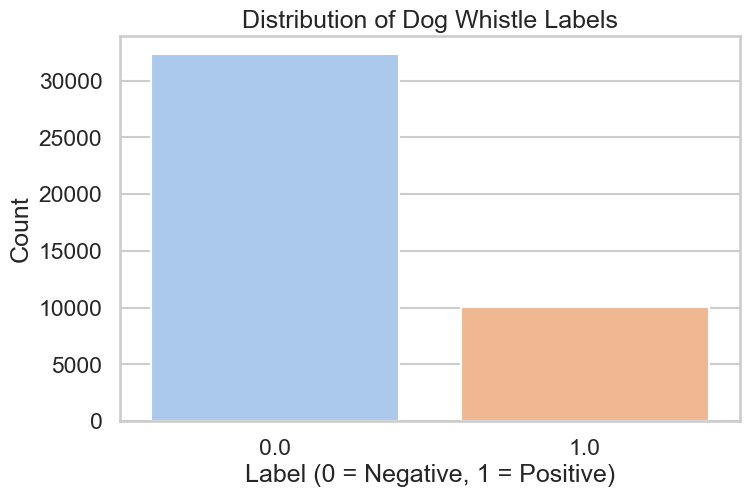

In [9]:
# Count plot for label distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='lable', data=df, palette='pastel')
plt.title("Distribution of Dog Whistle Labels")
plt.xlabel("Label (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()

In [21]:
df_pos = df[df['lable'] == 1]
df_neg = df[df['lable'] == 0]
# Count frequency of dog whistle terms in positive instances
term_counts = df_pos['dog_whistle'].value_counts().reset_index()
term_counts.columns = ['dog_whistle', 'count']
# Display the top 15 dog whistle terms
term_counts.head(15)

,dog_whistle,count
0,SJW,343
1,SJWs,200
2,cucks,124
3,based,105
4,globalist,98
5,beta,95
6,illegals,95
7,pedes,90
8,soybois,84
9,centipedes,77


/var/folders/vx/1wqkklmd4qzbv02gbc6344wc0000gn/T/ipykernel_46832/2784488256.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=term_counts.head(15), x='count', y='dog_whistle', palette='viridis')


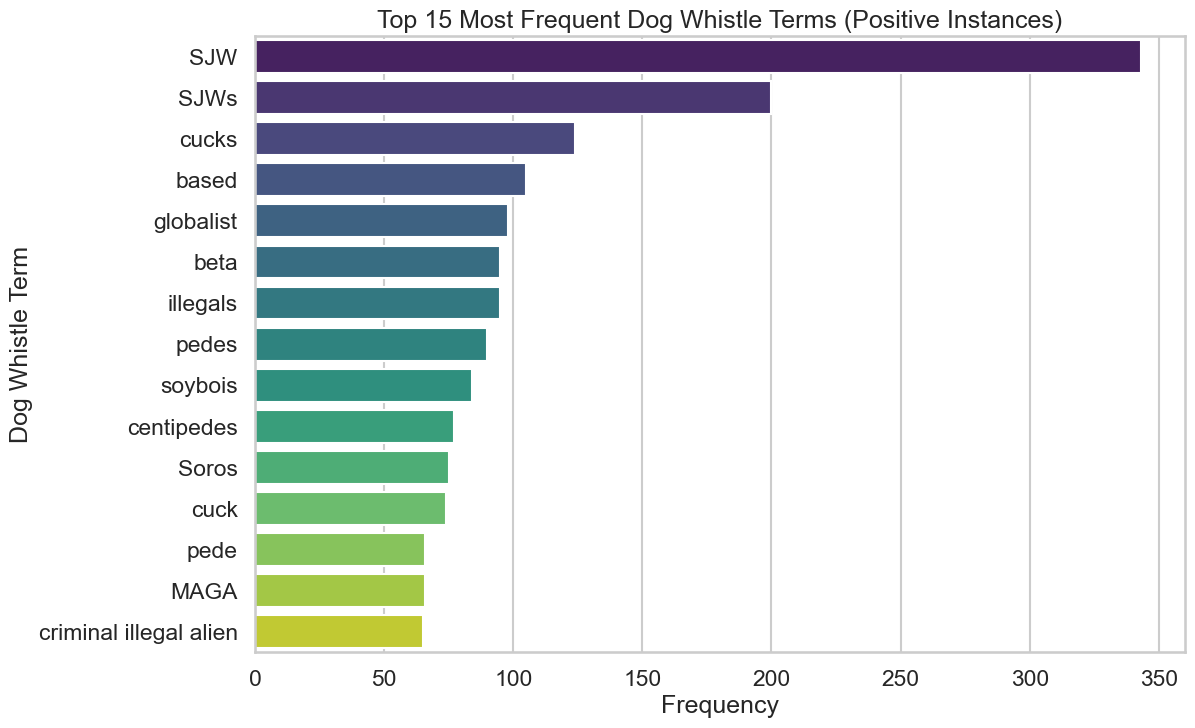

In [11]:
# Plot the top 15 dog whistle terms
plt.figure(figsize=(12, 8))
sns.barplot(data=term_counts.head(15), x='count', y='dog_whistle', palette='viridis')
plt.title("Top 15 Most Frequent Dog Whistle Terms (Positive Instances)")
plt.xlabel("Frequency")
plt.ylabel("Dog Whistle Term")
plt.show()

In [12]:
df_neg = df[df['lable'] == 0]

# Count frequency of dog whistle terms in negative instances
term_counts = df_neg['dog_whistle'].value_counts().reset_index()
term_counts.columns = ['dog_whistle', 'count']
# Display the top 15 negative dog whistle terms
term_counts.head(15)

,dog_whistle,count
0,single,1720
1,based,1643
2,Google,691
3,blue,481
4,SJW,362
5,MAGA,320
6,LGB,297
7,the Fed,292
8,echo,235
9,working class,221


/var/folders/vx/1wqkklmd4qzbv02gbc6344wc0000gn/T/ipykernel_46832/2784488256.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=term_counts.head(15), x='count', y='dog_whistle', palette='viridis')


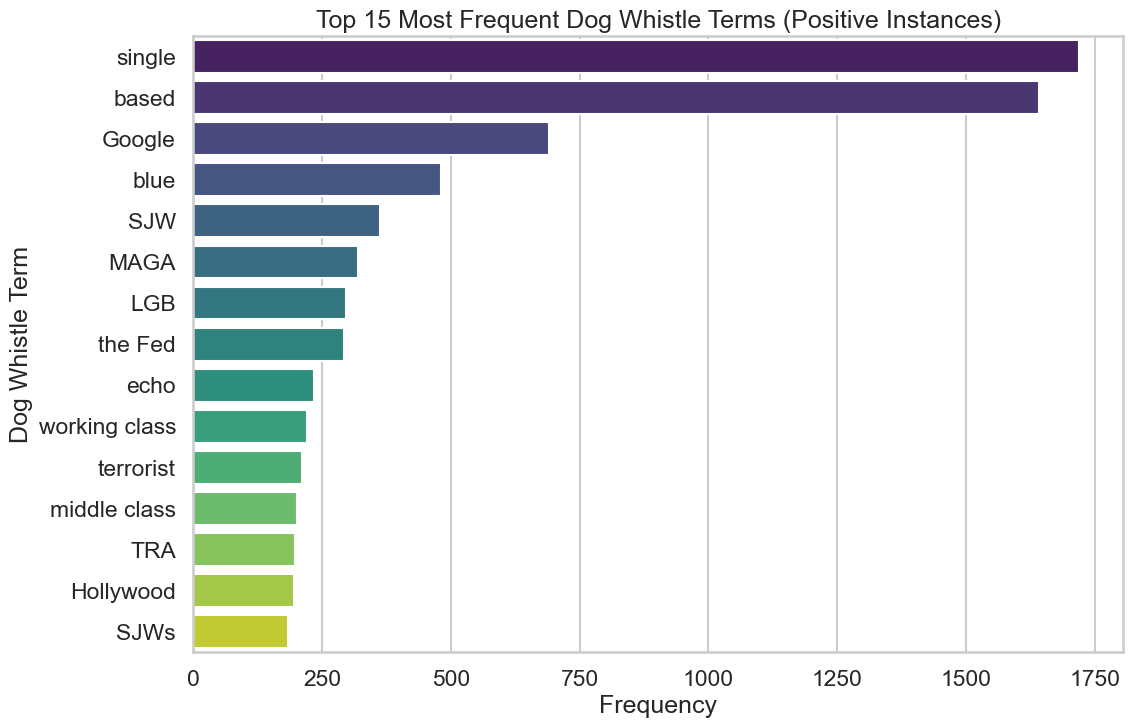

In [13]:
# Plot the top 15 dog whistle terms
plt.figure(figsize=(12, 8))
sns.barplot(data=term_counts.head(15), x='count', y='dog_whistle', palette='viridis')
plt.title("Top 15 Most Frequent Dog Whistle Terms (Positive Instances)")
plt.xlabel("Frequency")
plt.ylabel("Dog Whistle Term")
plt.show()

/var/folders/vx/1wqkklmd4qzbv02gbc6344wc0000gn/T/ipykernel_46832/941403844.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ingroup_counts, x='count', y='ingroup', palette='coolwarm')


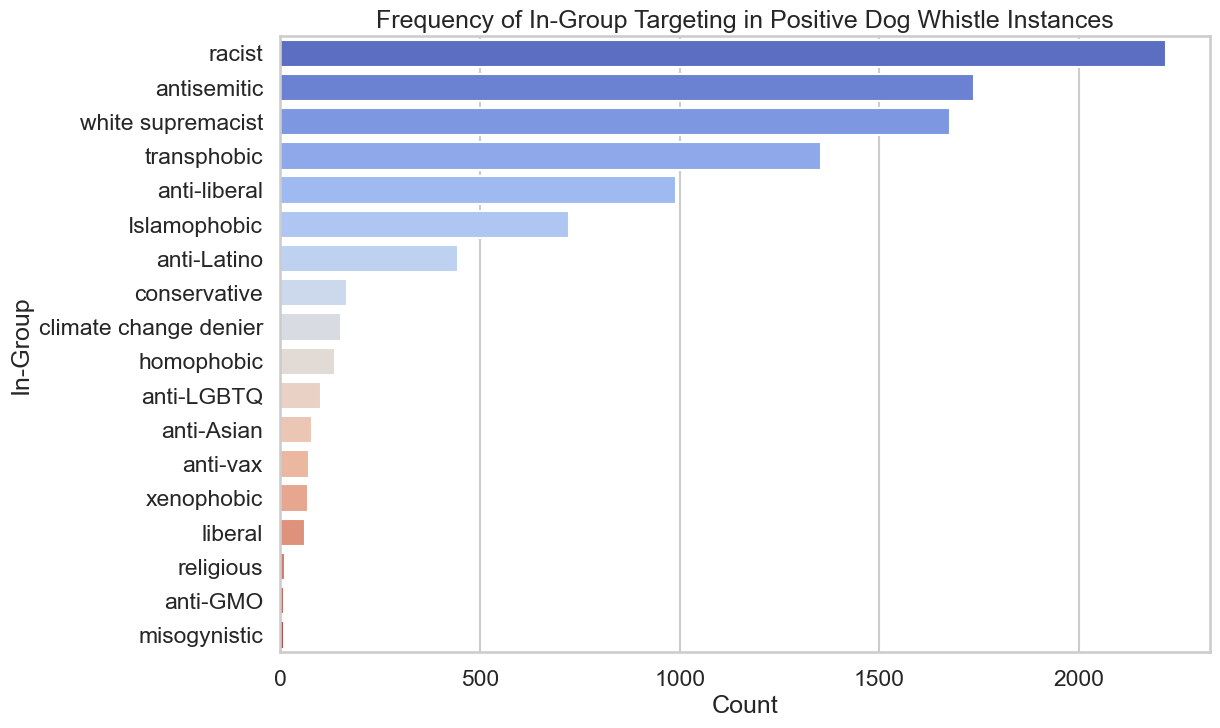

In [14]:
ingroup_counts = df_pos['ingroup'].value_counts().reset_index()
ingroup_counts.columns = ['ingroup', 'count']

plt.figure(figsize=(12, 8))
sns.barplot(data=ingroup_counts, x='count', y='ingroup', palette='coolwarm')
plt.title("Frequency of In-Group Targeting in Positive Dog Whistle Instances")
plt.xlabel("Count")
plt.ylabel("In-Group")
plt.show()

In [15]:
# Convert the 'date' column to datetime (adjust format if necessary)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check for any conversion issues
print(df['date'].isna().sum(), "missing or unparsed dates.")

32871 missing or unparsed dates.


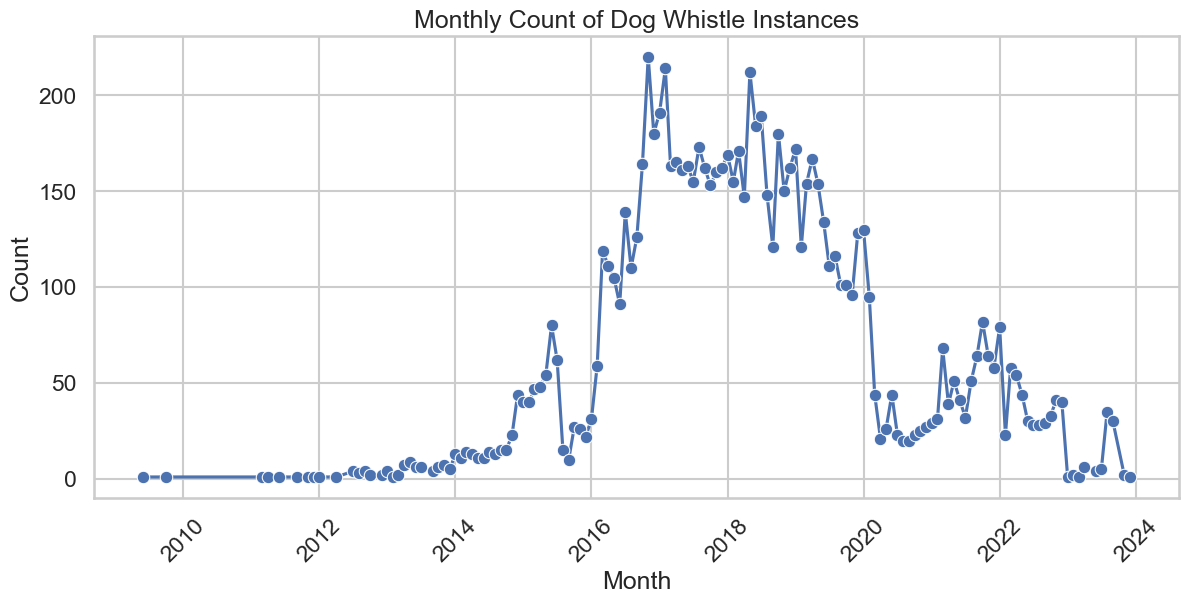

In [16]:
# Create a new column for year and month for aggregation
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.to_period('M')

# Plot monthly counts of dog whistle instances
monthly_counts = df.groupby('month').size().reset_index(name='counts')
monthly_counts['month'] = monthly_counts['month'].dt.to_timestamp()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_counts, x='month', y='counts', marker='o')
plt.title("Monthly Count of Dog Whistle Instances")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

/var/folders/vx/1wqkklmd4qzbv02gbc6344wc0000gn/T/ipykernel_46832/3618073414.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subreddit_counts.head(15), x='count', y='subreddit', palette='magma')


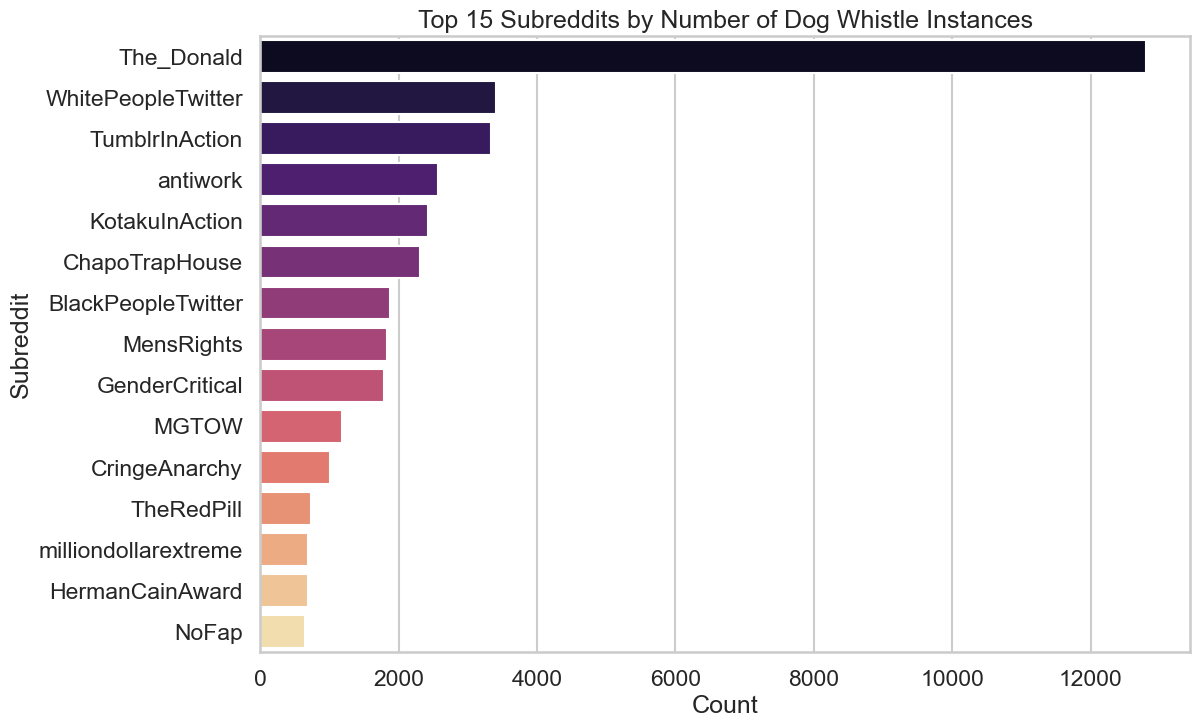

In [17]:
subreddit_counts = df['subreddit'].value_counts().reset_index()
subreddit_counts.columns = ['subreddit', 'count']

plt.figure(figsize=(12, 8))
sns.barplot(data=subreddit_counts.head(15), x='count', y='subreddit', palette='magma')
plt.title("Top 15 Subreddits by Number of Dog Whistle Instances")
plt.xlabel("Count")
plt.ylabel("Subreddit")
plt.show()


--- Label Distribution ---
lable
0.0    32302
1.0    10021
Name: count, dtype: int64


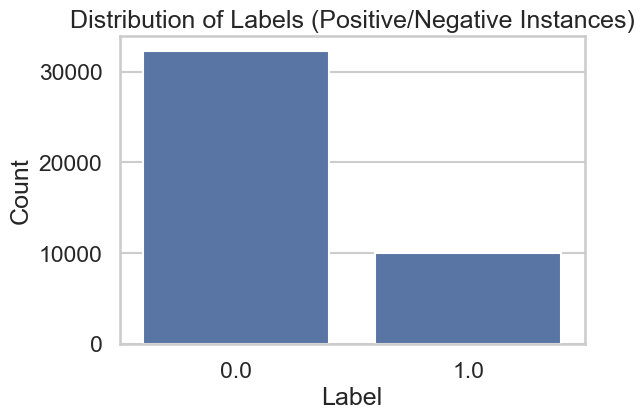


--- Top 20 Dog Whistles ---
dog_whistle
based            1748
single           1732
SJW               705
Google            692
blue              492
MAGA              386
SJWs              383
LGB               324
the Fed           299
working class     253
terrorist         246
echo              239
middle class      233
Hollywood         225
TRA               215
welfare           211
identify as       192
beta              188
cucks             188
boogaloo          180
Name: count, dtype: int64


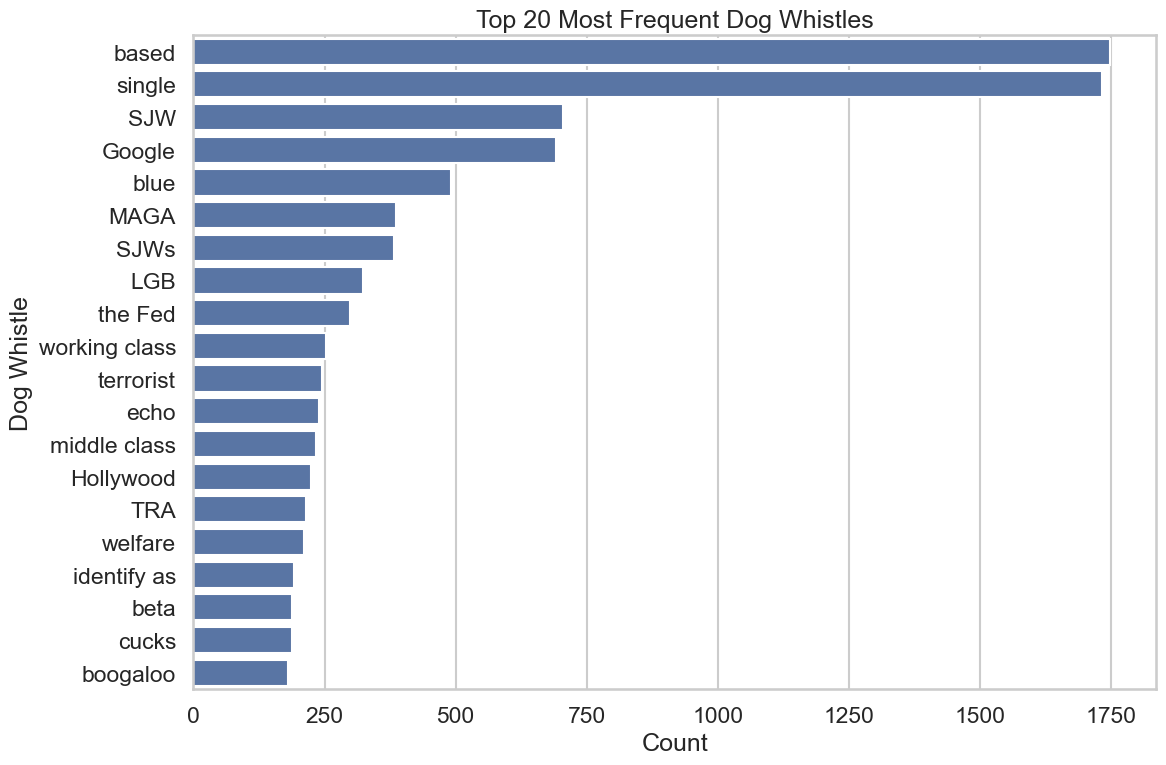


--- Top 15 Ingroups ---
ingroup
racist                   10844
antisemitic               7636
white supremacist         6832
transphobic               5964
homophobic                2753
Islamophobic              2280
anti-liberal              2173
anti-Latino                949
conservative               678
anti-LGBTQ                 336
liberal                    307
anti-GMO                   304
anti-Asian                 294
anti-vax                   286
climate change denier      283
Name: count, dtype: int64


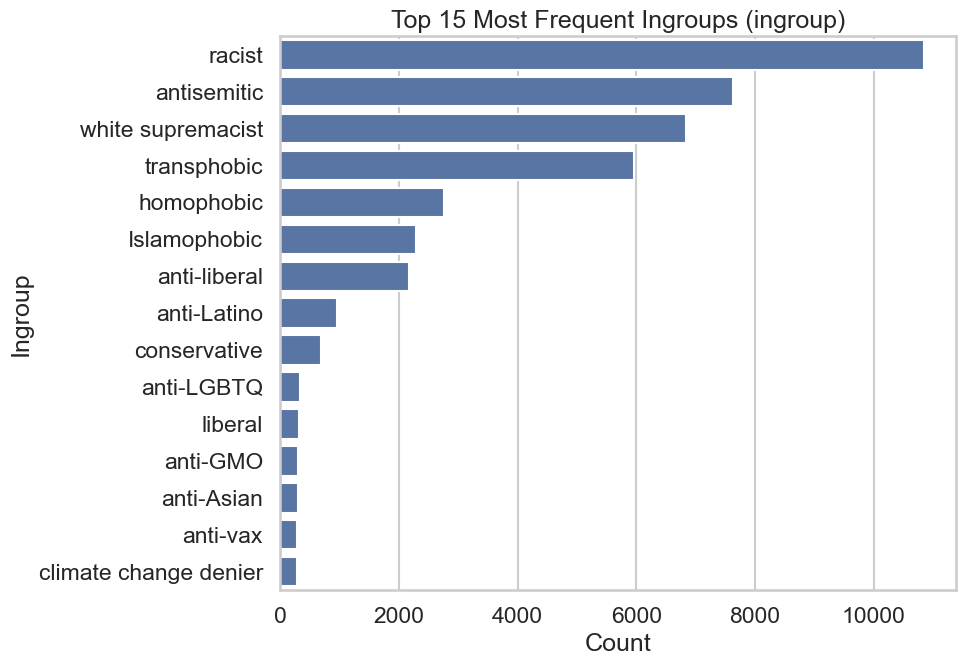


--- Top 15 Subreddits ---
subreddit
The_Donald              12801
WhitePeopleTwitter       3403
TumblrInAction           3340
antiwork                 2569
KotakuInAction           2417
ChapoTrapHouse           2308
BlackPeopleTwitter       1871
MensRights               1825
GenderCritical           1793
MGTOW                    1188
CringeAnarchy            1004
TheRedPill                727
milliondollarextreme      692
HermanCainAward           690
NoFap                     653
Name: count, dtype: int64


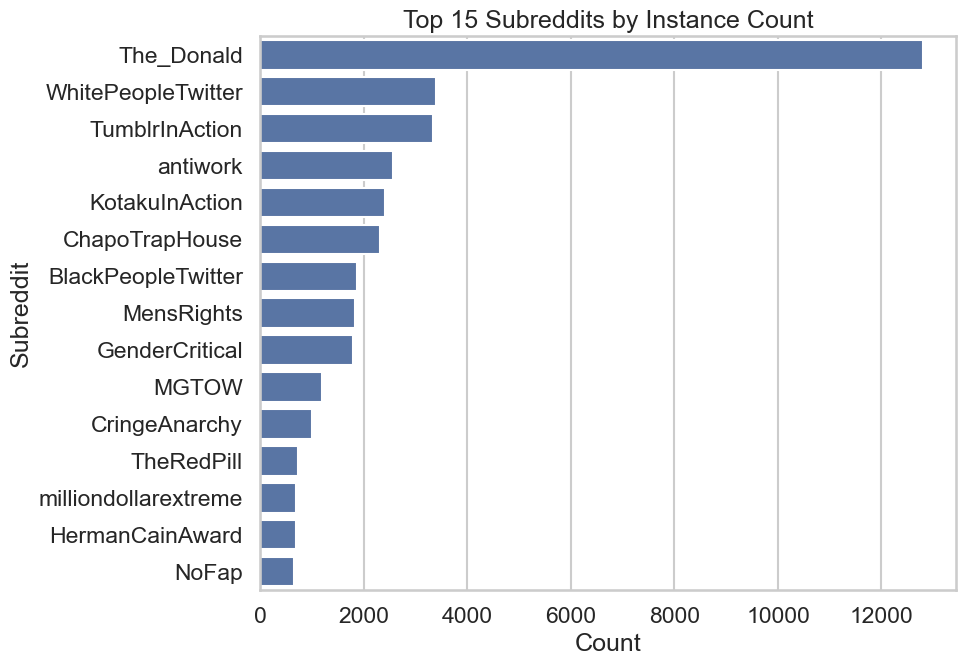

In [18]:
print("\n--- Label Distribution ---")
label_counts = df['lable'].value_counts()
print(label_counts)
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Labels (Positive/Negative Instances)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


print("\n--- Top 20 Dog Whistles ---")
top_dw = df['dog_whistle'].value_counts().nlargest(20)
print(top_dw)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_dw.index, x=top_dw.values, orient='h')
plt.title('Top 20 Most Frequent Dog Whistles')
plt.xlabel('Count')
plt.ylabel('Dog Whistle')
plt.tight_layout()
plt.show()

# Repeat for 'dog_whistle_root' if it provides different insights

print("\n--- Top 15 Ingroups ---")
# Decide which ingroup column to use, or combine if appropriate
ingroup_col = 'ingroup' # Or 'in_group'
top_ingroup = df[ingroup_col].value_counts().nlargest(15)
print(top_ingroup)
plt.figure(figsize=(10, 7))
sns.barplot(y=top_ingroup.index, x=top_ingroup.values, orient='h')
plt.title(f'Top 15 Most Frequent Ingroups ({ingroup_col})')
plt.xlabel('Count')
plt.ylabel('Ingroup')
plt.tight_layout()
plt.show()

# Compare with Figure 4 in Kruk et al. (2024) for informal data [cite: 127]

print("\n--- Top 15 Subreddits ---")
top_subreddit = df['subreddit'].value_counts().nlargest(15)
print(top_subreddit)
plt.figure(figsize=(10, 7))
sns.barplot(y=top_subreddit.index, x=top_subreddit.values, orient='h')
plt.title('Top 15 Subreddits by Instance Count')
plt.xlabel('Count')
plt.ylabel('Subreddit')
plt.tight_layout()
plt.show()

# Repeat for 'community' and 'source' if they provide distinct, useful information


--- Label Distribution for Top 20 Co-occurring Dog Whistles ---
lable                                                0.0  1.0
dog_whistle_root                                             
lifelong bachelor                                   1975   24
based                                               1643  105
social justice warrior                               616  584
Google                                               767    5
cuck                                                 319  306
blueish                                              590   15
MAGA                                                 390   83
Islamic terrorists                                   354   94
LGB rights                                           375   54
working class                                        372   56
TRAs                                                 313   85
references to cities with large racial minority...   329   59
race realism                                         285   96
centi

/var/folders/vx/1wqkklmd4qzbv02gbc6344wc0000gn/T/ipykernel_46832/1061514880.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


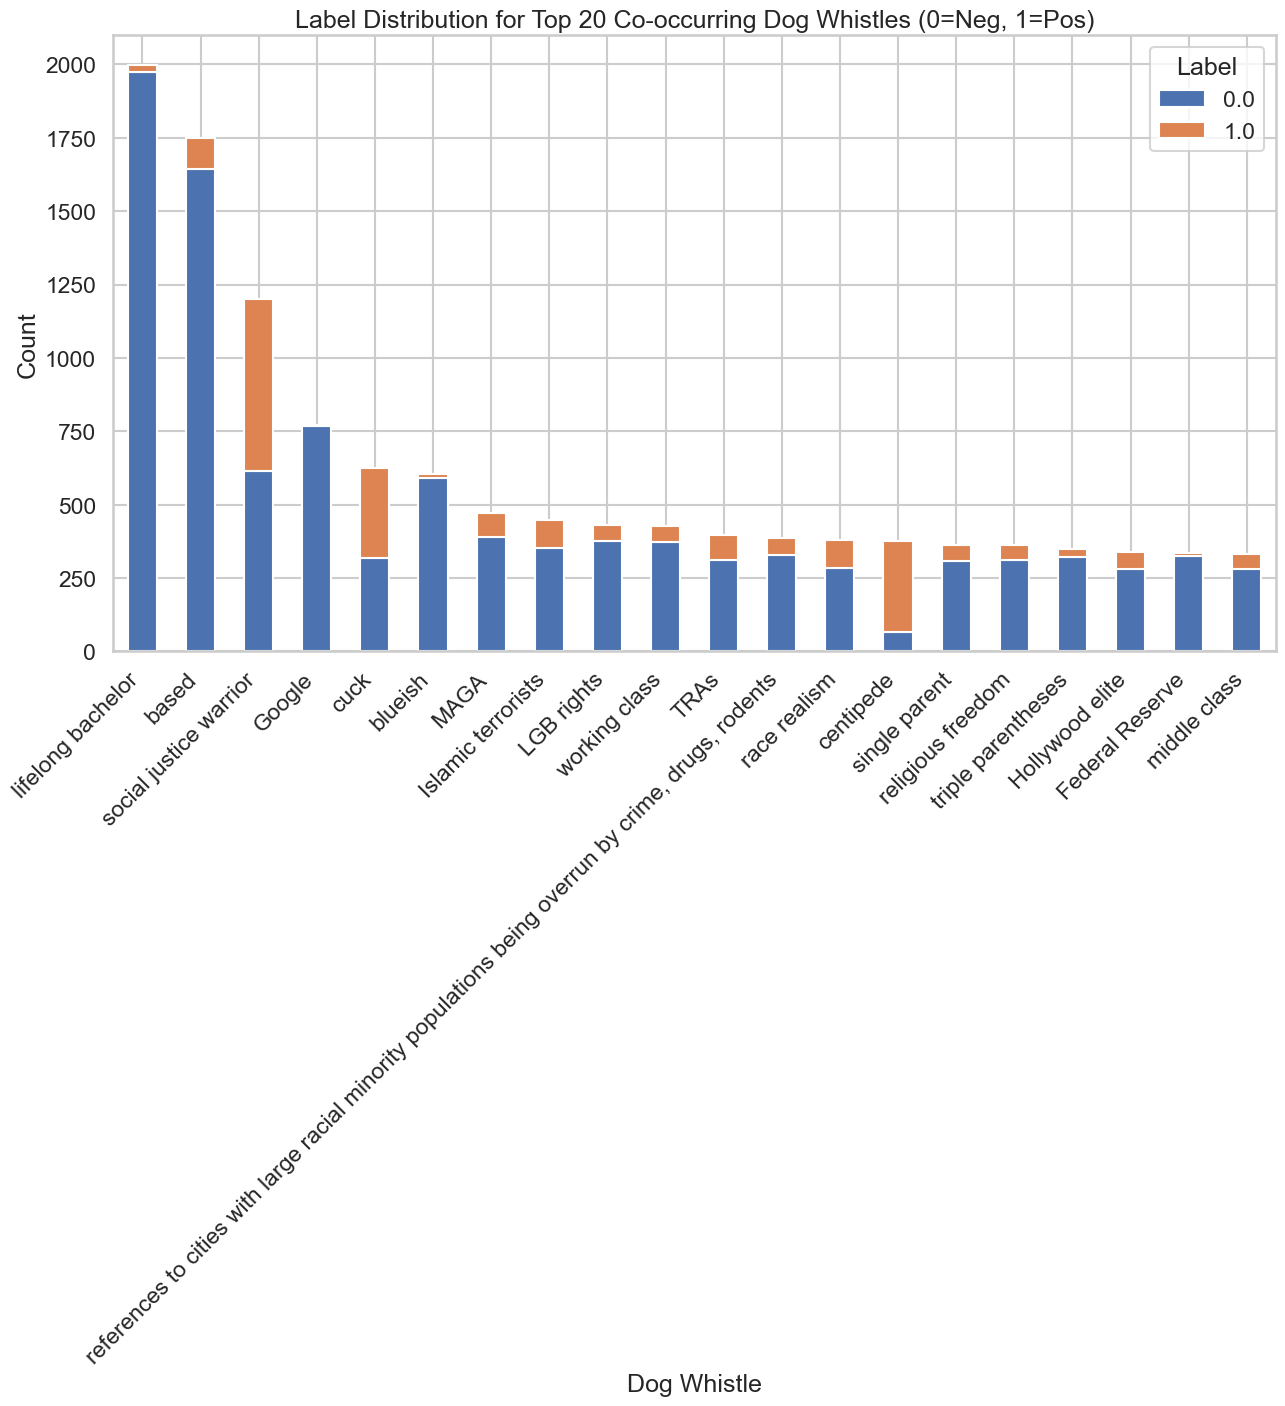


--- Label Distribution for Top 15 Co-occurring Ingroups (ingroup) ---
lable                   0.0   1.0
ingroup                          
racist                 8626  2218
antisemitic            5900  1736
white supremacist      5154  1678
transphobic            4610  1354
homophobic             2616   137
Islamophobic           1558   722
anti-liberal           1182   991
anti-Latino             504   445
conservative            511   167
anti-LGBTQ              233   103
liberal                 244    63
anti-GMO                294    10
anti-Asian              214    80
anti-vax                213    73
climate change denier   131   152


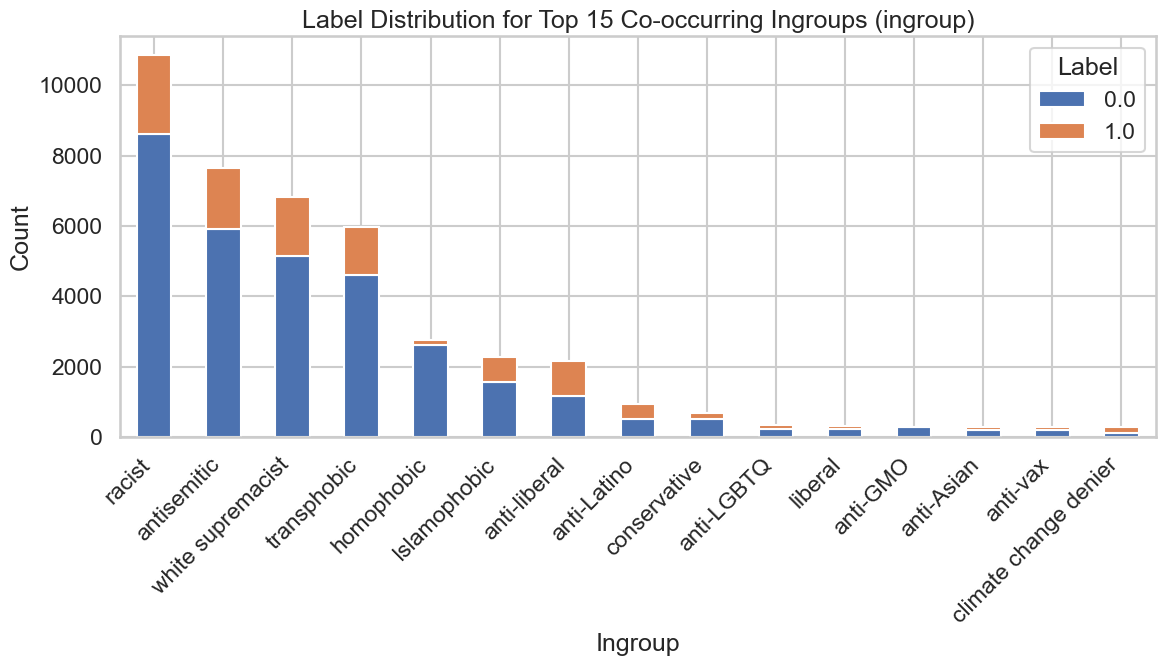


--- Crosstab: Top 10 Subreddits vs. Top 10 Ingroups ---
ingroup               Islamophobic  anti-LGBTQ  anti-Latino  anti-liberal  \
subreddit                                                                   
ChapoTrapHouse                 107           1           11            55   
CoonTown                        15           1            2            13   
CringeAnarchy                   58           2           12            47   
GenderCritical                  14           9            1            10   
KotakuInAction                 151          14           18           453   
MGTOW                           29           2            3            50   
The_Donald                    1100          25          743           546   
TumblrInAction                 111          26           14           487   
WhitePeopleTwitter             202         128           47            46   
milliondollarextreme            23           0            3            89   

ingroup           

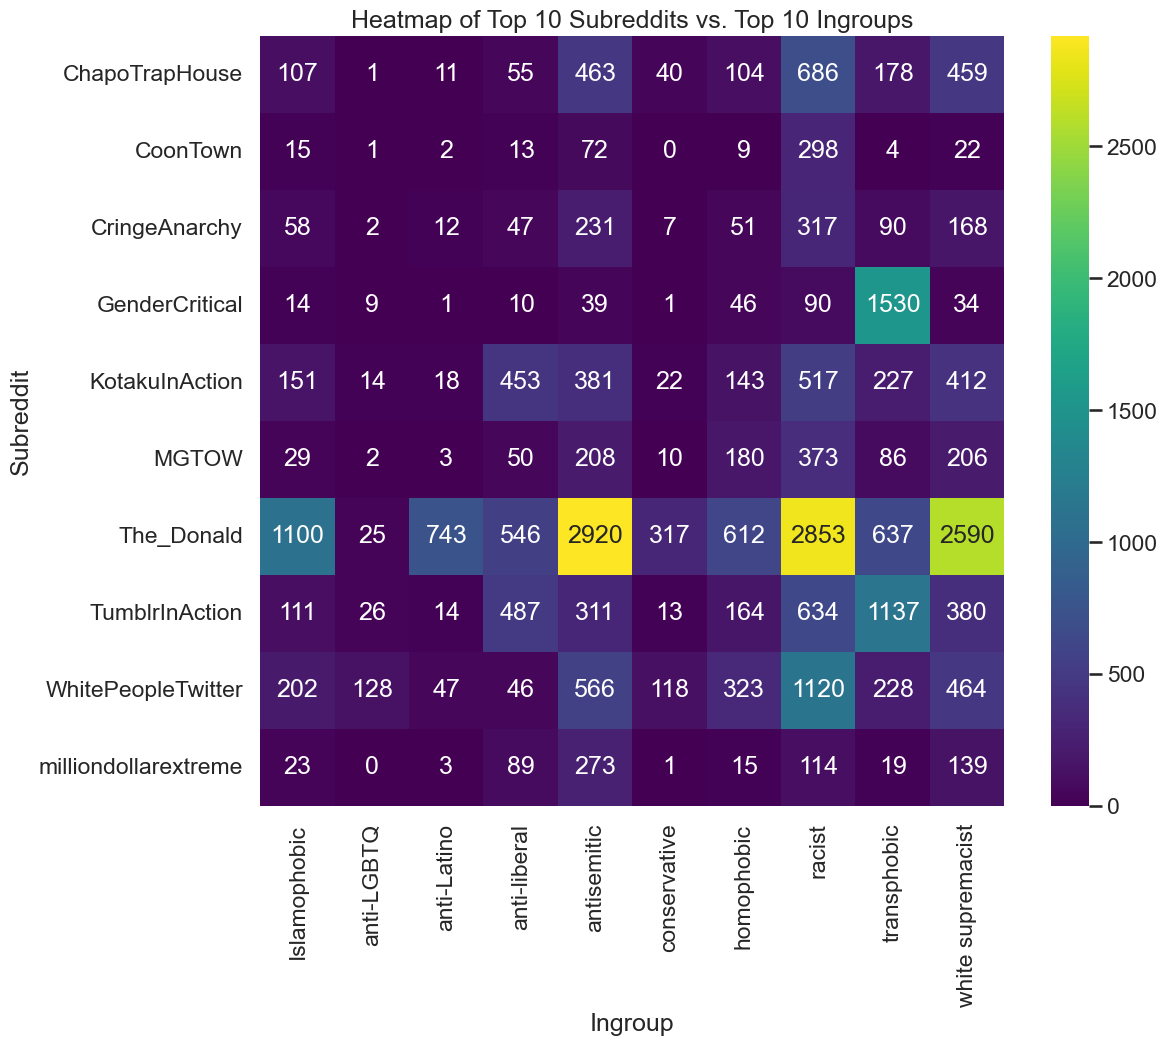


--- Temporal Trends for Top 10 Dog Whistles: ['social justice warrior', 'centipede', 'cuck', 'soy boy', 'illegal aliens', 'globalist', 'illegal immigrant', 'autogynephile', 'beta', 'multiculturalism'] ---


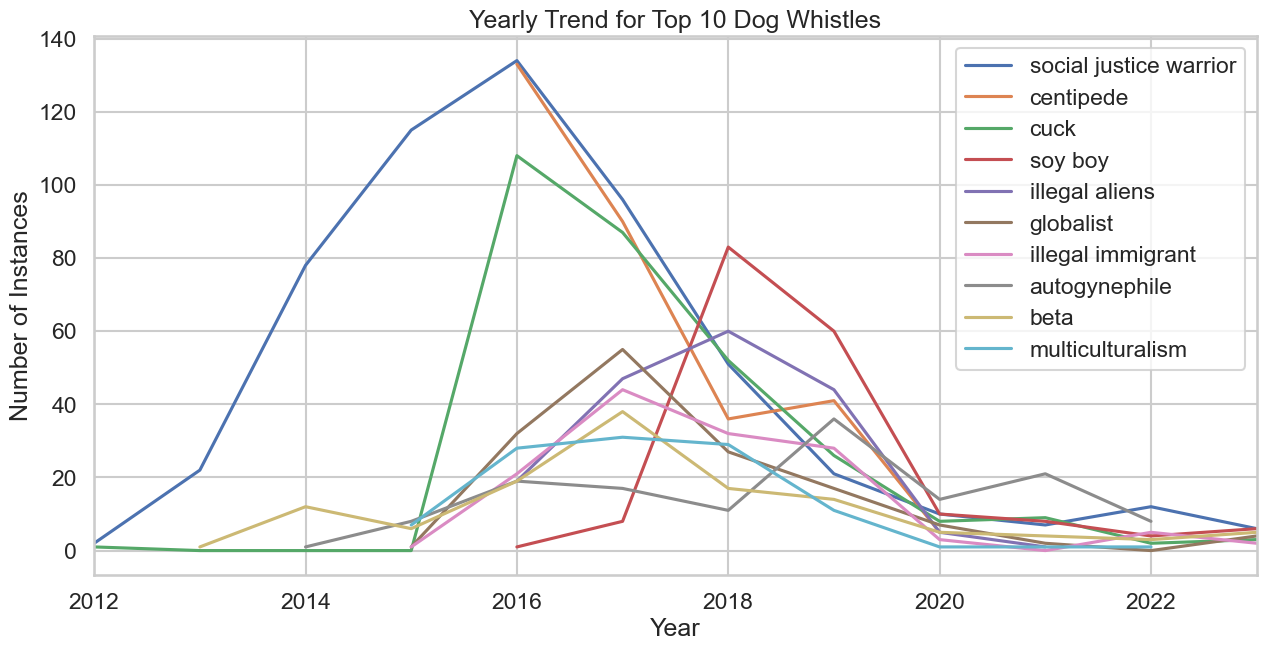

In [22]:
# Dog Whistle vs. Label
# (Focus on dog whistles appearing in both positive and negative instances)
dw_label_counts = df.groupby(['dog_whistle_root', 'lable']).size().unstack(fill_value=0)
dw_label_counts['total'] = dw_label_counts.sum(axis=1)
# Filter for dog whistles with at least N total instances and occurrences in both classes
min_total = 10 # Example threshold
min_class = 2 # Example threshold
relevant_dw = dw_label_counts[(dw_label_counts['total'] >= min_total) & (dw_label_counts[0] >= min_class) & (dw_label_counts[1] >= min_class)]

if not relevant_dw.empty:
    print("\n--- Label Distribution for Top 20 Co-occurring Dog Whistles ---")
    # Sort by total count and take top 20
    top_relevant_dw = relevant_dw.sort_values('total', ascending=False).head(20)
    print(top_relevant_dw[[0, 1]]) # Assuming 0=Negative, 1=Positive

    # Plotting stacked bar chart for these top dog whistles
    top_relevant_dw[[0, 1]].plot(kind='bar', stacked=True, figsize=(15, 8))
    plt.title('Label Distribution for Top 20 Co-occurring Dog Whistles (0=Neg, 1=Pos)')
    plt.xlabel('Dog Whistle')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Label')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo dog whistles met the criteria for co-occurrence analysis.")

# Ingroup vs. Label (Similar analysis)
ingroup_label_counts = df.groupby([ingroup_col, 'lable']).size().unstack(fill_value=0)
ingroup_label_counts['total'] = ingroup_label_counts.sum(axis=1)
relevant_ingroups = ingroup_label_counts[(ingroup_label_counts['total'] >= min_total) & (ingroup_label_counts[0] >= min_class) & (ingroup_label_counts[1] >= min_class)]

if not relevant_ingroups.empty:
    print(f"\n--- Label Distribution for Top 15 Co-occurring Ingroups ({ingroup_col}) ---")
    top_relevant_ingroups = relevant_ingroups.sort_values('total', ascending=False).head(15)
    print(top_relevant_ingroups[[0, 1]])

    top_relevant_ingroups[[0, 1]].plot(kind='bar', stacked=True, figsize=(12, 7))
    plt.title(f'Label Distribution for Top 15 Co-occurring Ingroups ({ingroup_col})')
    plt.xlabel('Ingroup')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Label')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo ingroups met the criteria for co-occurrence analysis.")


# Subreddit vs. Ingroup (Heatmap or Crosstab)
print("\n--- Crosstab: Top 10 Subreddits vs. Top 10 Ingroups ---")

# Only include positive instances for this analysis
top_10_subs = df_pos['subreddit'].value_counts().nlargest(10).index
top_10_ingroups = df[ingroup_col].value_counts().nlargest(10).index
sub_ingroup_crosstab = pd.crosstab(df[df['subreddit'].isin(top_10_subs)]['subreddit'],
                                   df[df[ingroup_col].isin(top_10_ingroups)][ingroup_col])
print(sub_ingroup_crosstab)

plt.figure(figsize=(12, 10))
sns.heatmap(sub_ingroup_crosstab, annot=True, fmt="d", cmap="viridis")
plt.title('Heatmap of Top 10 Subreddits vs. Top 10 Ingroups')
plt.xlabel('Ingroup')
plt.ylabel('Subreddit')
plt.show()


# Temporal Trends for Specific Dog Whistles/Ingroups (Example: Top 3 dog whistles)

top_10_dw = df_pos['dog_whistle_root'].value_counts().nlargest(10).index
print(f"\n--- Temporal Trends for Top 10 Dog Whistles: {list(top_10_dw)} ---")
plt.figure(figsize=(15, 7))
for dw in top_10_dw:
    dw_trend = df_pos[df_pos['dog_whistle_root'] == dw].set_index('date').resample('YE').size()
    dw_trend.plot(label=dw)

plt.title('Yearly Trend for Top 10 Dog Whistles')
plt.xlabel('Year')
plt.ylabel('Number of Instances')
plt.legend()
plt.show()
